# Euclid Domain for Path and Container

Loading images: 100%|██████████| 256/256 [00:00<00:00, 5569.69it/s]
/Users/sunyiqi/Documents/GitHub/MetaLearner/datasets/primitive/euclid_dataset/euclid_scenes.py:316: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(image)


16384


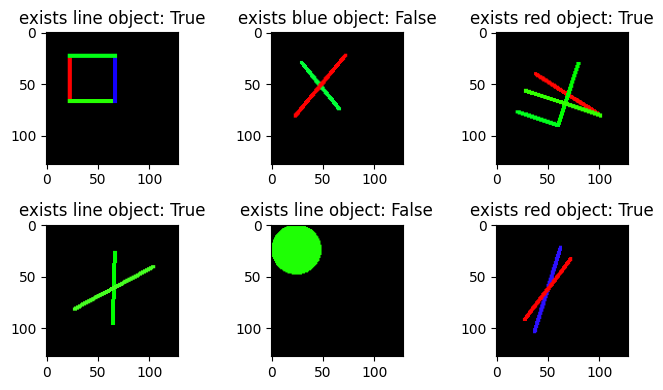

In [2]:
import matplotlib.pyplot as plt

from datasets.primitive.euclid_dataset.euclid_scenes import save_euclid_dataset, load_euclid_dataset, EuclidDatasetUnwrapped
root = "/Users/sunyiqi/Documents/Datasets/euclid/"
train_euclid_dataset = load_euclid_dataset(root + "train")
test_euclid_dataset = load_euclid_dataset(root + "test")
print(len(train_euclid_dataset))

plt.figure(figsize=(7, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_euclid_dataset[i]['image'].numpy())
    plt.title(train_euclid_dataset[i]['query'] + ': ' + str(train_euclid_dataset[i]['answer']))
    #stprint(train_dataset[i])
plt.tight_layout()
plt.show()

In [3]:
from core.learn import AutoLearnSchedule
from helchriss.logger import set_logger_output_file

from core.model import MetaLearner
learner = MetaLearner([])
learner.cheat = 1
learner.load_ckpt("outputs/checkpoints/prototype")
#learner.load_ckpt("outputs/checkpoints/euclid")

#print(learner.executor.parser._entries)
#learner.executor.parser.supress = 1
#print(learner.executor.parser.parse("filter(objects(),green())"))

schedule = AutoLearnSchedule(train_euclid_dataset, test_euclid_dataset)

#schedule.procedual_train(learner, lr = 2e-4)
#learner.save_ckpt("outputs/checkpoints/euclid")

25 00:58:34 WRN `ExecutorGroup` The input domain is empty, creating an empty domain
25 00:58:34 WRN `SearchExecutor` The input domain is empty, creating an empty domain
25 00:58:34 WRN `ExecutorGroup` The input domain is empty, creating an empty domain
25 00:58:34 WRN `SearchExecutor` The input domain is empty, creating an empty domain


In [ ]:
#learner.save_ckpt("outputs/checkpoints/euclid")

0

25 22:11:14 WRN `ExecutorGroup` The input domain is empty, creating an empty domain
25 22:11:14 WRN `SearchExecutor` The input domain is empty, creating an empty domain
25 22:11:14 WRN `ExecutorGroup` The input domain is empty, creating an empty domain
25 22:11:14 WRN `SearchExecutor` The input domain is empty, creating an empty domain


exists line object
True
red filter: tensor([False,  True])
green filter: tensor([ True, False])
blue filter: tensor([False, False])
line filter: tensor([False,  True])
circle filter: tensor([ True, False])


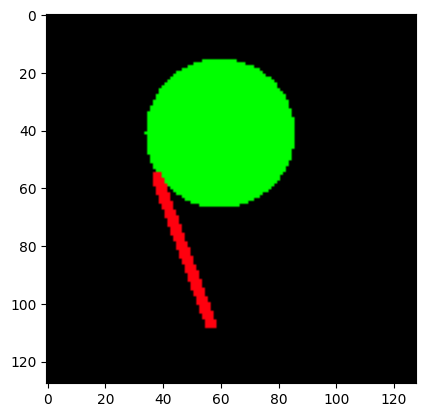

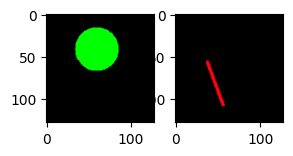

In [ ]:
from core.model import MetaLearner
learner = MetaLearner([])
learner.cheat = 1
learner.load_ckpt("outputs/checkpoints/euclid")


idx = 1
grounding = train_euclid_dataset[idx]["grounding"]
img = grounding["image"]
segments = grounding["segment"]
print(train_euclid_dataset[idx]["query"])
print(train_euclid_dataset[idx]["answer"])


#program = "filter(objects(), blue)"
#program = "exists(filter(objects(), circle))"
plt.figure("Euclid Grounding Scene")
plt.imshow(img)
plt.figure("Segment Objects")
w,h,n = segments.shape
a = n // 4
for i in range(n):
    plt.subplot(a + 1,4,i + 1)

    plt.imshow(segments[:,:,i][...,None] * img)

for tag in ["red", "green", "blue", "line", "circle"]:
    program = f"filter(objects(), {tag})"

    measure, loss = learner.executor.evaluate(program, grounding)
    #print(measure)
    print(f"{tag} filter:",measure.value[:,0] > 0)



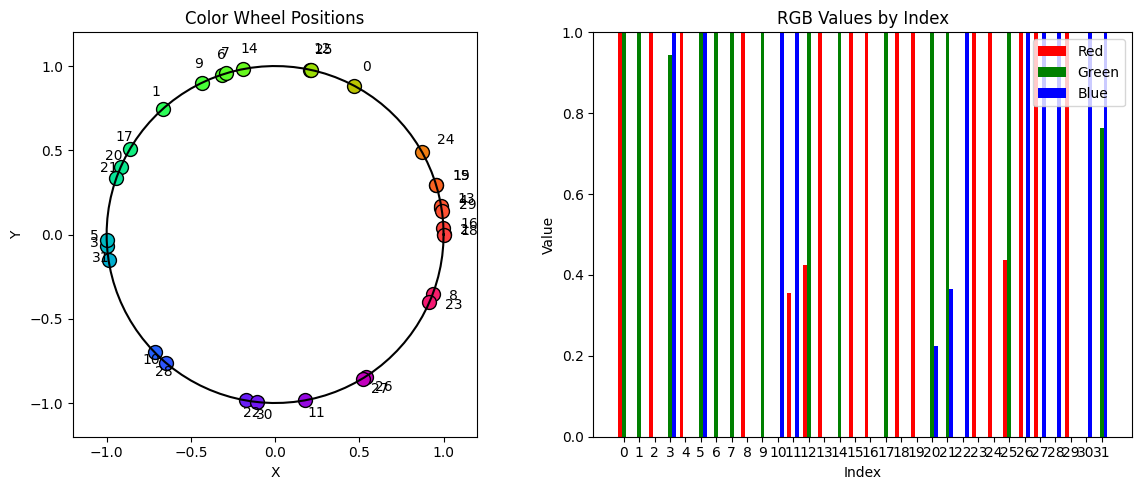

In [ ]:
from domains.visual.color_domain import color_executor
if __name__ == "__main__":
    import torch
    colors = torch.randn([32,1])
    color_executor.visualize(colors)

In [10]:
from datasets.primitive.euclid_dataset import *
from datasets.primitive.euclid_dataset.euclid_scenes import save_euclid_dataset, load_euclid_dataset, EuclidDatasetUnwrapped
train_euclid_dataset = EuclidDatasetUnwrapped(2048 * 8)
test_euclid_dataset = EuclidDatasetUnwrapped(256)

root = "/Users/sunyiqi/Documents/Datasets/euclid/"
save_euclid_dataset(train_euclid_dataset,root + "train")
save_euclid_dataset(test_euclid_dataset, root + "test")

load_euclid_dataset(root + "train")
load_euclid_dataset(root + "test")

/Users/sunyiqi/Documents/GitHub/MetaLearner/datasets/primitive/euclid_dataset/euclid_engine.py:195: RuntimeWarning: overflow encountered in exp
  u_deviation = np.log1p(np.exp(-u)) + np.log1p(np.exp(u - 1))
/Users/sunyiqi/Documents/GitHub/MetaLearner/datasets/primitive/euclid_dataset/euclid_engine.py:193: RuntimeWarning: overflow encountered in exp
  t_deviation = np.log1p(np.exp(-t)) + np.log1p(np.exp(t - 1))
/opt/anaconda3/envs/soulforge/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
Loading images: 100%|██████████| 256/256 [00:00<00:00, 3871.39it/s]



Scene Metadata: {'num_objects': 3, 'mask_info': {'background_value': 0, 'object_channel_mapping': {'l1': 0, 'l2': 1, 'l3': 2}, 'mask_shape': torch.Size([128, 128, 3])}, 'canvas_size': 128, 'objects': [{'name': 'l1', 'type': 'line', 'geometry': tensor([ 35.1206, 106.1537,  75.7506,  92.6526]), 'color_name': 'blue', 'color_rgb': tensor([0.0784, 0.0000, 1.0000])}, {'name': 'l2', 'type': 'line', 'geometry': tensor([75.7506, 92.6526, 60.6904, 47.3288]), 'color_name': 'blue', 'color_rgb': tensor([0.1058, 0.2577, 1.0000])}, {'name': 'l3', 'type': 'line', 'geometry': tensor([ 60.6904,  47.3288, 101.7853,  33.6749]), 'color_name': 'blue', 'color_rgb': tensor([0.0000, 0.0611, 1.0000])}]}

Meta [{'name': 'l1', 'type': 'line', 'geometry': tensor([ 35.1206, 106.1537,  75.7506,  92.6526]), 'color_name': 'blue', 'color_rgb': tensor([0.0784, 0.0000, 1.0000])}, {'name': 'l2', 'type': 'line', 'geometry': tensor([75.7506, 92.6526, 60.6904, 47.3288]), 'color_name': 'blue', 'color_rgb': tensor([0.1058, 0.

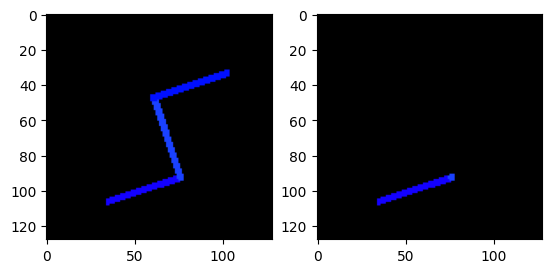

In [ ]:

def colored_triangle(colors = ["red", "green", "blue"]):
    program = f"l1:line(p1, p2)[color({colors[0]})];l2:line(p2, p3)[color({colors[1]})];l3:line(p3, p1)[color({colors[2]})];"
    return program

def colored_right_triangle(colors = ["red", "green", "blue"]):
    program = f"""
    l1:line(p1, p2)[color({colors[0]})];
    l2:line(p2, p3)[perpendicular(l1,l2),perpendicular(l2,l1),color({colors[1]})];
    l3:line(p3, p1)[color({colors[2]})];
    """
    return program

def colored_equilateral_triangle(colors=["red", "green", "blue"]):
    program = f"""
l1:line(p1, p2)[color({colors[0]})];
l2:line(p2, p3)[color({colors[1]}), length(l2, length(l1))];
l3:line(p3, p1)[color({colors[2]}), length(l3, length(l1))];
"""
    return program.strip()

def colored_square(colors=["red", "green", "blue", "red"]):
    program = f"""
l1:line(p1, p2)[color({colors[0]})];
l2:line(p2, p3)[color({colors[1]}), perpendicular(l2, l1)];
l3:line(p3, p4)[color({colors[2]}), perpendicular(l3, l2), parallel(l3, l1)];
l4:line(p4, p1)[color({colors[3]}), perpendicular(l4, l3), parallel(l4, l2)];
"""
    return program.strip()

def tangent_line_and_circle(line_color="red", circle_color="blue"):
    dsl_program = f"""
c1:circle(p1, p2)[color({circle_color})];

l1:line(p3, p4)[color({line_color}), tangent(l1, c1)];
"""
    return dsl_program.strip()

def two_circle_line_connect():
    circle_color1 = "red"
    circle_color2 = "green"
    line_color    = "blue"
    program = f"""
    c1:circle(p1,p2)[color({circle_color1}),!overlap(c2,c1)];
    c2:circle(p3,p4)[color({circle_color2}), !overlap(c1,c2)];
    l1:line(p1,p3)[color({line_color})];

    """
    #l2:line(p1,p6)[color(yellow), perpendicular(l1,l2)]

    return program

def custom2():
    line_color = "blue"
    program = f"""
    l1:line(p1,p2)[color({line_color})];
    l2:line(p2,p3)[color({line_color}), perpendicular(l1,l2),perpendicular(l2,l1)];
    l3:line(p3,p4)[color({line_color}), perpendicular(l2,l3),perpendicular(l3,l2)];
    """

    return program

def cross_line_angle(line1_color="red", line2_color="green"):
    program = f"""
l1:line(p1, p2)[color({line1_color}),];
l2:line(p3, p4)[color({line2_color}),intersect(l2, l1)];
l3:line(p4, p6)[color({line2_color}), perpendicular(l3,l2), perpendicular(l2,l3)];
l4:line(p1, p8)[color(yellow),parallel(l3,l4), parallel(l4,l3)];
"""
    return program.strip()

if __name__ == "__main__":
    from domains.math.euclid_domain import euclid_executor
    from datasets.primitive.euclid_dataset import generate_constrained_scene

    program = """
    c1:circle(p1,p2)[color(red)];
    c2:circle(p3,p4)[color(blue)];
""".replace(" ","")
    
    # triangle program
    #program = colored_triangle()
    #program = colored_right_triangle()
    #program = colored_square()
    #program = colored_equilateral_triangle()
    #program = tangent_line_and_circle()
    #program = two_circle_line_connect()
    #program = custom2()
    #program = cross_line_angle()
    #program = "c1:circle(p1,p1)[color(blue)]"

    # Generate constrained scene
    scene_img, segment, scene_meta = generate_constrained_scene(dsl_program = program)
    
    # Print metadata (DSL program + object specs)
    print(f"\nScene Metadata: {scene_meta}")
    print(f"\nMeta {scene_meta['objects']}")

    print(scene_img.shape, segment.shape)

    import matplotlib.pyplot as plt
    plt.subplot(121)
    plt.imshow(scene_img.permute(1,2,0))
    plt.subplot(122)
    plt.imshow(segment[:,:,0][...,None] * scene_img.permute(1,2,0))

    # Save rendered scene
    #import PIL.Image as Image
    #img_np = (scene_img.permute(1,2,0).cpu().numpy() * 255).astype("uint8")
    #Image.fromarray(img_np).save("constrained_scene_example.png")
    #print("Constrained scene saved as 'constrained_scene_example.png'")